In [3]:
import pandas as pd
customers = pd.read_csv(r"C:\Users\sandr\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\sandr\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\sandr\Downloads\Transactions.csv")
merged_data = transactions.merge(customers, on='CustomerID')


In [4]:
# Create customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'TransactionDate': 'max'
}).reset_index()

# Calculate recency (days since last transaction)
customer_profiles['Recency'] = (pd.to_datetime('today') - pd.to_datetime(customer_profiles['TransactionDate'])).dt.days
customer_profiles.rename(columns={'TransactionID': 'NumTransactions'}, inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(customer_profiles[['TotalValue', 'NumTransactions', 'Recency']])

C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

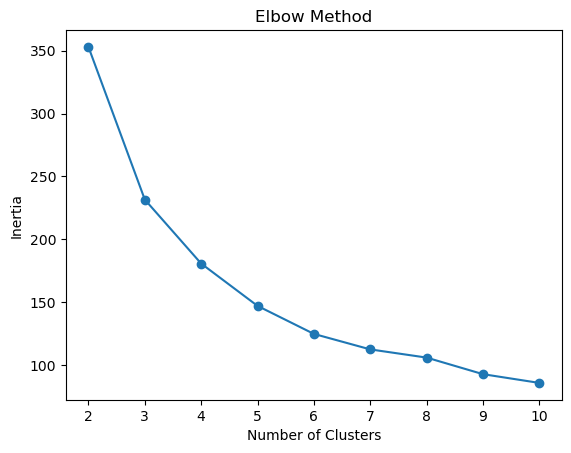

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
# Fit K-Means with the chosen number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(features)

C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(features, customer_profiles['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.0013370859992454


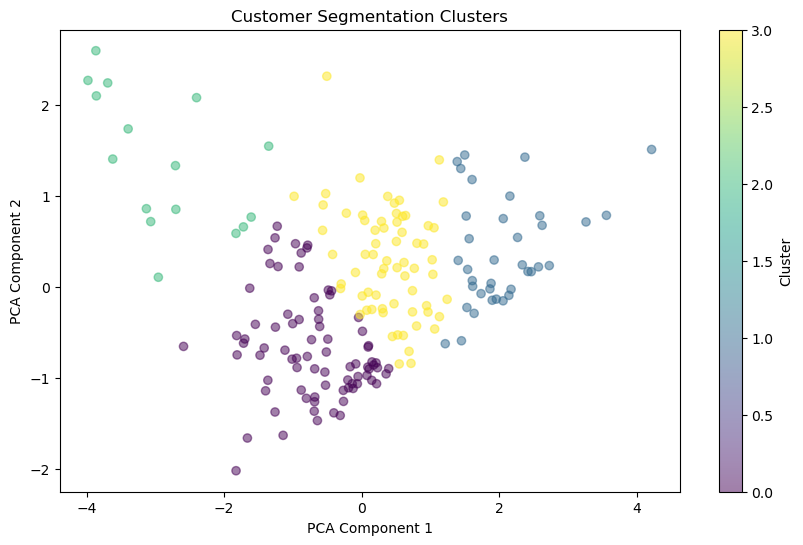

In [9]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=customer_profiles['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()